In [26]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

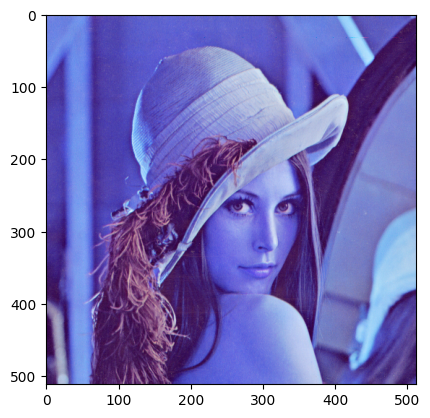

In [5]:
# lena.png を読み込み, 表示

img = cv2.imread("lena.png")
plt.imshow(img)

青く表示されてしまった, これは cv2 がデフォルトで色をRGBではなく *BGR*で読み込むことによって起こっているらしい.

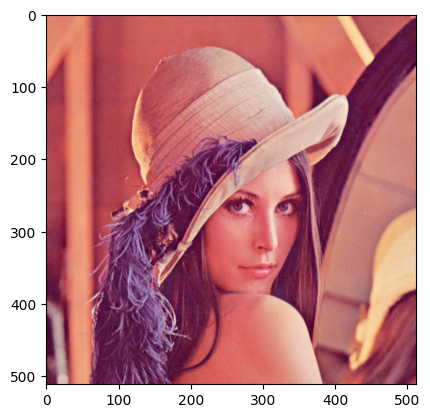

In [10]:
# RGB に変換 して表示
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

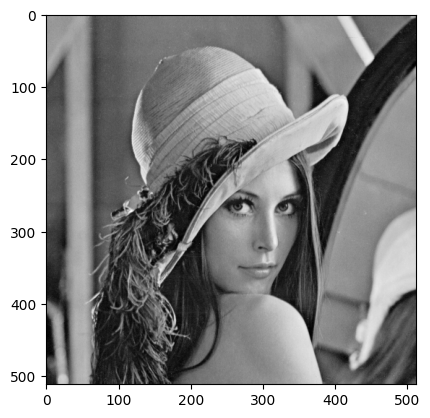

In [6]:
# グレースケールに変換して、表示
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')

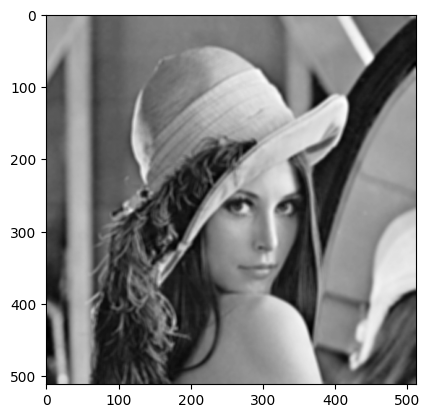

In [ ]:
# 平均化フィルタ
kernel_size = (5, 5)
img_blur_avg = cv2.blur(img_gray, kernel_size)
plt.imshow(img_blur_avg, cmap='gray')

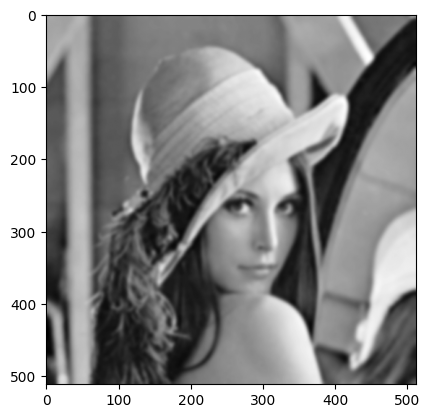

In [22]:
# ガウシアンフィルタ
img_blur_gaussian = cv2.GaussianBlur(img_gray, (13, 13), -1)
plt.imshow(img_blur_gaussian, cmap='gray')

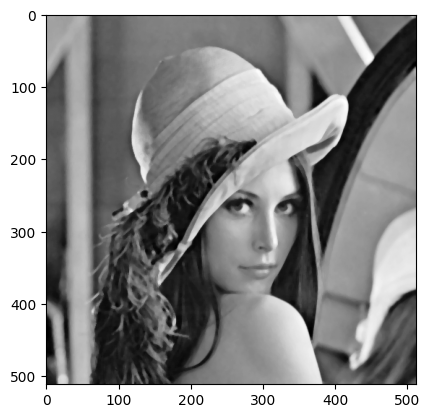

In [23]:
# メディアンフィルタ
img_blur_median = cv2.medianBlur(img_gray, 5)
plt.imshow(img_blur_median, cmap='gray')

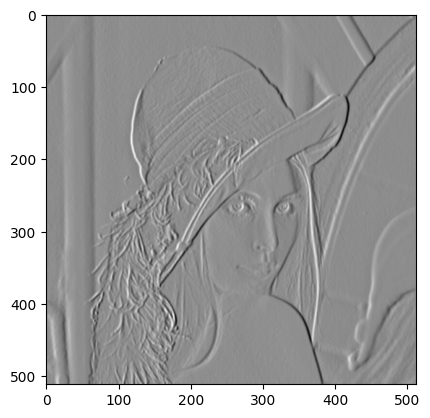

In [ ]:
# 微分フィルタ x方向
img_diff = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=5)
plt.imshow(img_diff, cmap='gray')

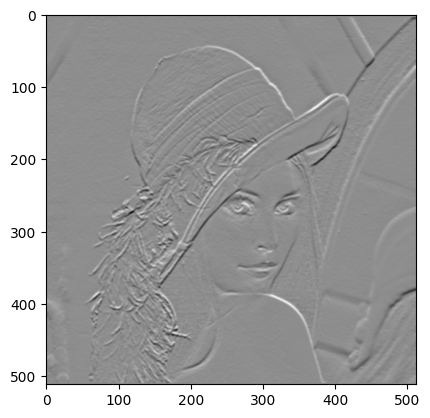

In [7]:
# 微分フィルタ y方向
img_diff_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=5)
plt.imshow(img_diff_y, cmap='gray')

C:\Users\Setup\AppData\Local\Temp\ipykernel_32316\3426553401.py:24: UserWarning: Glyph 21246 (\N{CJK UNIFIED IDEOGRAPH-52FE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Setup\AppData\Local\Temp\ipykernel_32316\3426553401.py:24: UserWarning: Glyph 37197 (\N{CJK UNIFIED IDEOGRAPH-914D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Setup\AppData\Local\Temp\ipykernel_32316\3426553401.py:24: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Setup\AppData\Local\Temp\ipykernel_32316\3426553401.py:24: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Setup\AppData\Local\Temp\ipykernel_32316\3426553401.py:24: UserWarning: Glyph 12365 (\N{HIRAGANA LETTER KI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Setup\AppData\Local\Temp\ipykernel_32316\3426553401.py:24: UserWarning: Glyph 12373 (\N{HIRAGANA LETTE

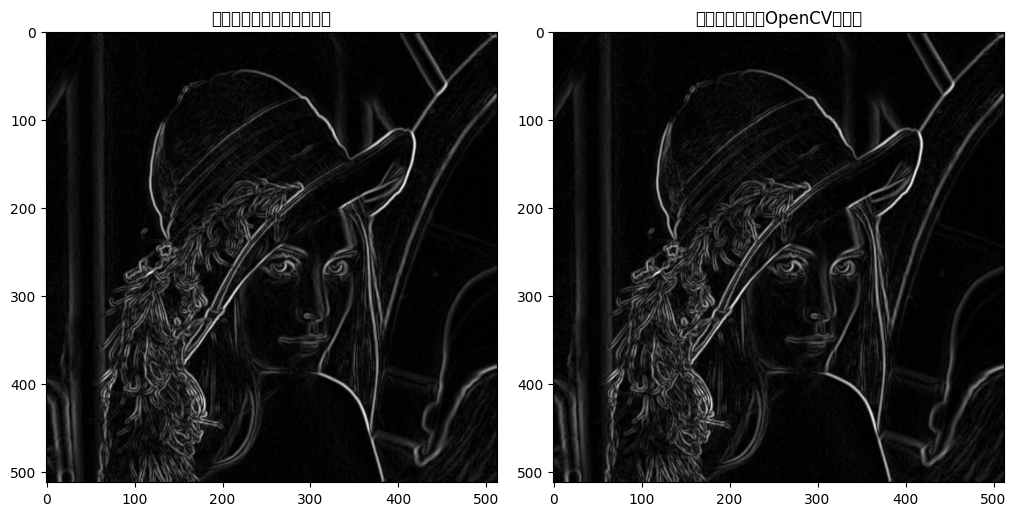

In [ ]:
# xとyの微分フィルタを合成する

# Sobelフィルタでx方向とy方向の勾配を計算
sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=5)

# 方法2: 勾配の大きさを計算（ピタゴラスの定理）
# sqrt(sobelx^2 + sobely^2)
sobel_magnitude = np.sqrt(sobelx**2 + sobely**2)
sobel_magnitude = cv2.normalize(sobel_magnitude, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

# 方法3: OpenCVのcv2.magnitude関数を使用
gradient_magnitude = cv2.magnitude(sobelx, sobely)
gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

# 結果を表示
plt.figure(figsize=(15, 10))
plt.subplot(235), plt.imshow(sobel_magnitude, cmap='gray'), plt.title('勾配の大きさ（手動計算）')
plt.subplot(236), plt.imshow(gradient_magnitude, cmap='gray'), plt.title('勾配の大きさ（OpenCV関数）')
plt.tight_layout()
plt.show()

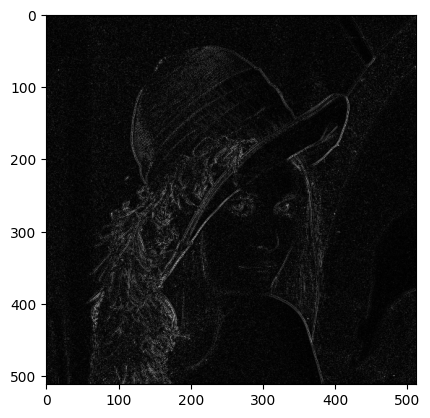

In [18]:
# ラプラシアンフィルタ
img_laplacian = cv2.Laplacian(img_gray, cv2.CV_64F)
plt.imshow(np.abs(img_laplacian), cmap='gray')

C:\Users\Setup\AppData\Local\Temp\ipykernel_32316\1205603191.py:21: UserWarning: Glyph 20803 (\N{CJK UNIFIED IDEOGRAPH-5143}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Setup\AppData\Local\Temp\ipykernel_32316\1205603191.py:21: UserWarning: Glyph 30011 (\N{CJK UNIFIED IDEOGRAPH-753B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Setup\AppData\Local\Temp\ipykernel_32316\1205603191.py:21: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Setup\AppData\Local\Temp\ipykernel_32316\1205603191.py:21: UserWarning: Glyph 12502 (\N{KATAKANA LETTER BU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Setup\AppData\Local\Temp\ipykernel_32316\1205603191.py:21: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Setup\AppData\Local\Temp\ipykernel_32316\1205603191.py:21: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAG

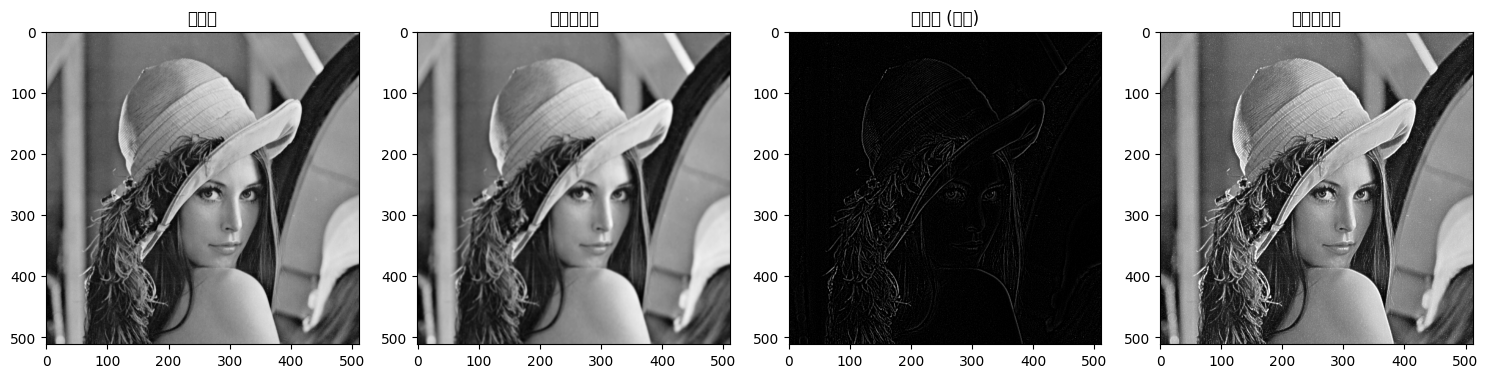

In [47]:
# アンシャープマスキング

# 平滑化(ブラー)画像を作成
blur_kernel_size = (5, 5)
img_blur = cv2.GaussianBlur(img_gray, blur_kernel_size, 0)

# 元画像とブラー画像の差分を計算し、係数をかける
alpha = 3.0  # 鮮明化の強さを制御する係数
mask = cv2.subtract(img_gray, img_blur)  # 差分（マスク）を計算
enhanced_mask = cv2.multiply(mask, alpha)  # 係数をかける

# マスクを元画像に足して鮮明化
img_sharp = cv2.add(img_gray, enhanced_mask)

# 結果を表示
plt.figure(figsize=(15, 5))
plt.subplot(1,4,1), plt.imshow(img_gray, cmap='gray'), plt.title('元画像')
plt.subplot(1,4,2), plt.imshow(img_blur, cmap='gray'), plt.title('ブラー画像')
plt.subplot(1,4,3), plt.imshow(mask, cmap='gray'), plt.title('マスク (差分)')
plt.subplot(1,4,4), plt.imshow(img_sharp, cmap='gray'), plt.title('鮮明化画像')
plt.tight_layout()
plt.show()

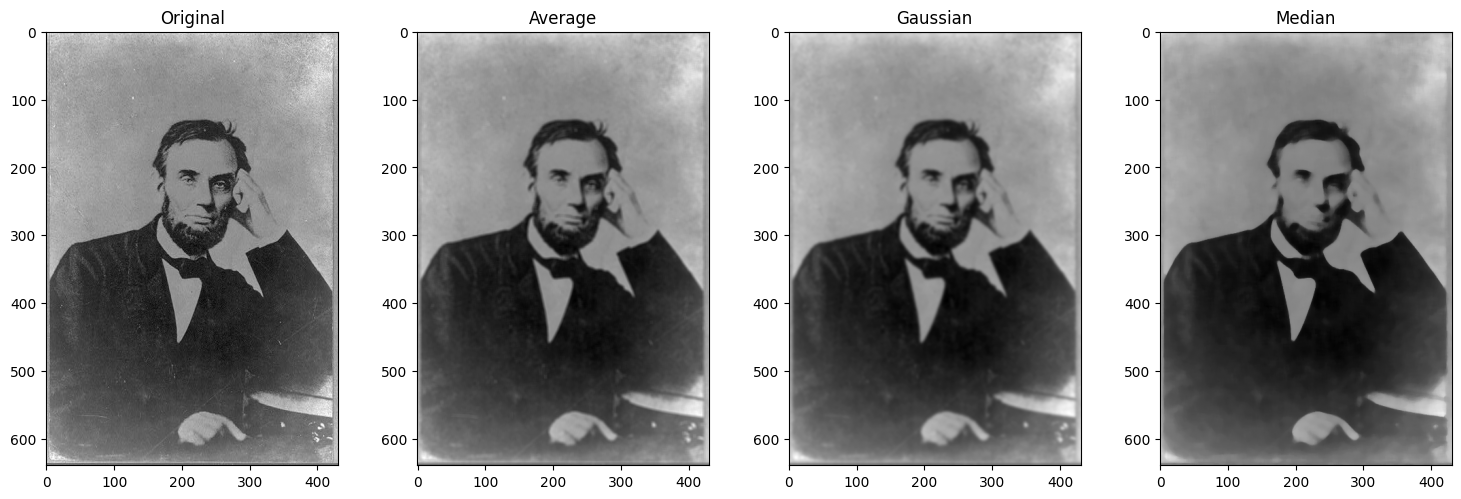

In [ ]:
##画像をよくする - ノイズ除去

plt.figure(figsize=(15, 5))
# 画像の読み込み
img_lin_bgr = cv2.imread("lincoln.jpg")
img_lin_gray = cv2.cvtColor(img_lin_bgr, cv2.COLOR_BGR2GRAY)

# 平均化フィルタ
img_lin_blur_avg = cv2.blur(img_lin_gray, (5, 5))

# ガウシアンフィルタ
img_lin_blur_gaussian = cv2.GaussianBlur(img_lin_gray, (11, 11), 0)

# メディアンフィルタ
img_lin_blur_median = cv2.medianBlur(img_lin_gray, 9)

plt.subplot(1, 4, 1),plt.imshow(img_lin_gray, cmap='gray'), plt.title('Original')
plt.subplot(1, 4, 2), plt.imshow(img_lin_blur_avg, cmap='gray'), plt.title('Average')
plt.subplot(1, 4, 3), plt.imshow(img_lin_blur_gaussian, cmap='gray'), plt.title('Gaussian')
plt.subplot(1, 4, 4), plt.imshow(img_lin_blur_median, cmap='gray'), plt.title('Median')
plt.tight_layout()
plt.show()


　ここでは、すこし白いノイズのある画像に各種フィルタ(平均化, ガウシアン, メディアン フィルタ)を適用した。
　ガウシアンフィルタでは、服の上部分の色が見やすくなっているが、ブラーのため、顔が認識しづらくなっている面もある。ノイズのピクセルは輝度が局所的な変動を起こしているため、近傍のピクセルに依存する平滑化フィルタではノイズが除去できる。ただしこの画像の下部のように大部分が変化している場合、近傍のピクセルにもノイズが乗っているため、それらに影響されてしまい、ノイズが除去できなかったのではないかと考えられる。
　また、メディアンフィルタは色が滲んだような特徴的な見え方となっている。これは、近傍のピクセルの中央値を選ぶことで、小さな範囲内では同一のピクセルが選ばれやすく、単色で塗りつぶしたような色になるためと考えられる。

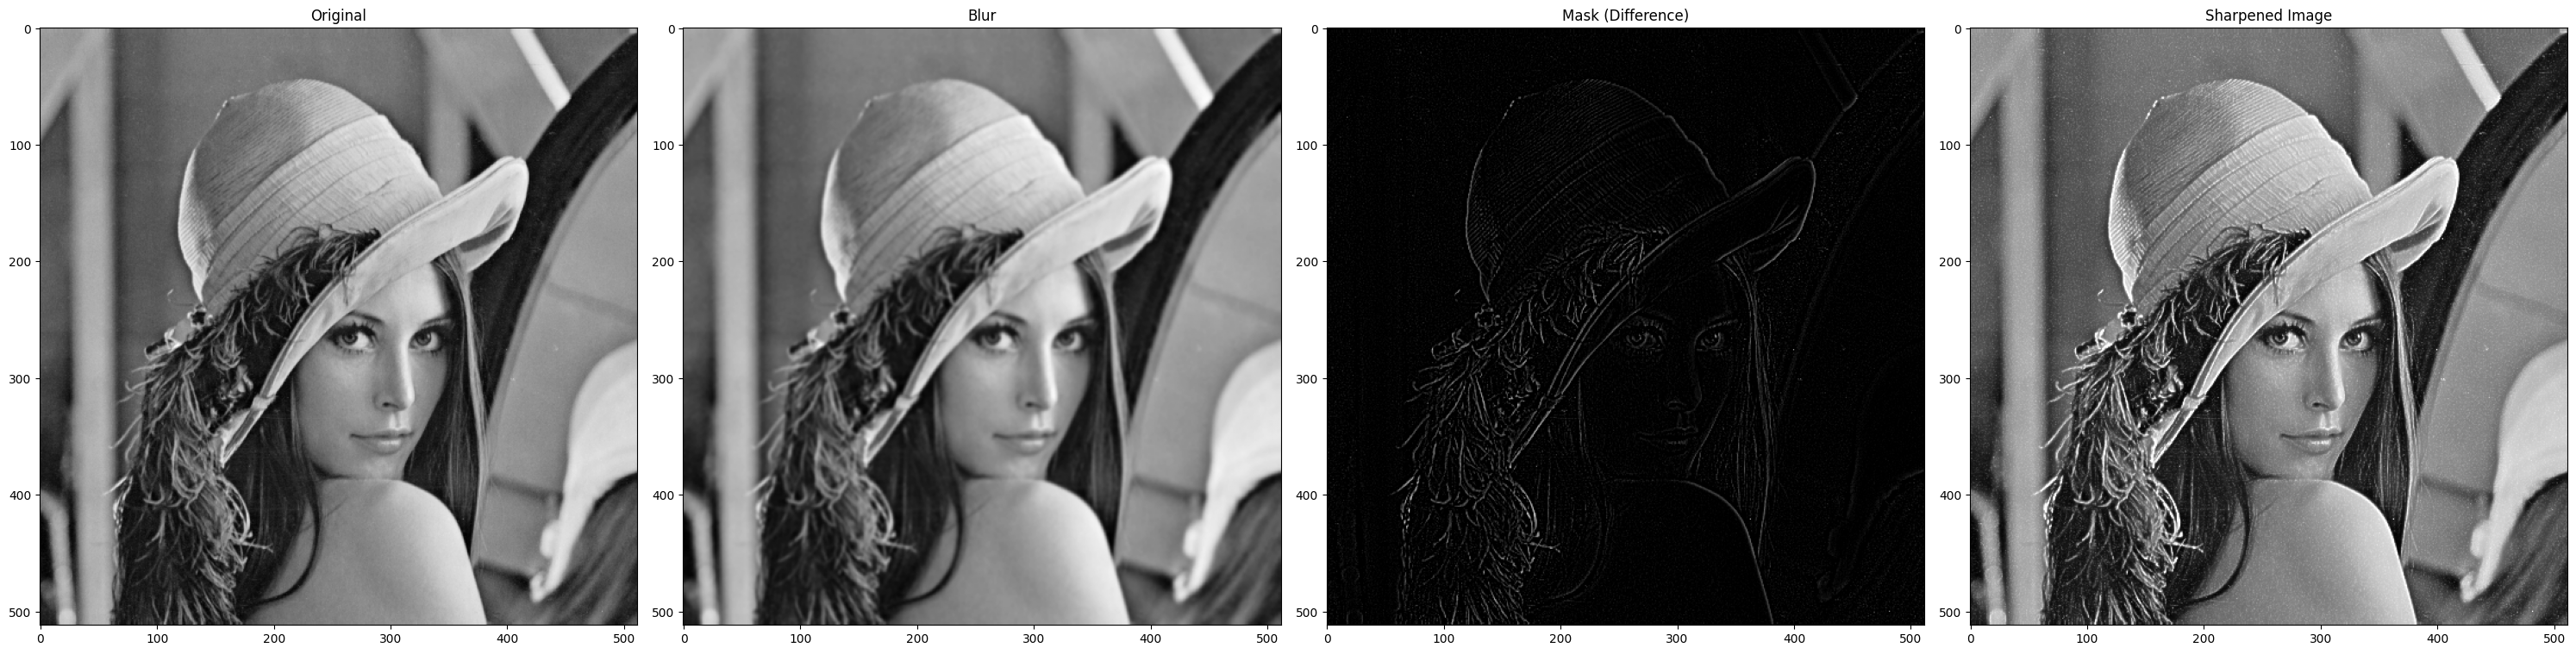

In [58]:
## 画像をよくする -　アンシャープマスキング


# 画像の読み込み
img = cv2.imread("lena.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 平滑化(ブラー)画像を作成
blur_kernel_size = (5, 5)
img_blur = cv2.GaussianBlur(img_gray, blur_kernel_size, 0)

# 元画像とブラー画像の差分を計算し、係数をかける
alpha = 3.0  # 鮮明化の強さを制御する係数
mask = cv2.subtract(img_gray, img_blur)  # 差分（マスク）を計算
enhanced_mask = cv2.multiply(mask, alpha)  # 係数をかける

# マスクを元画像に足して鮮明化
img_sharp = cv2.add(img_gray, enhanced_mask)

# 結果を表示
plt.figure(figsize=(30, 20))
plt.subplot(1,4,1), plt.imshow(img_gray, cmap='gray'), plt.title('Original')
plt.subplot(1,4,2), plt.imshow(img_blur, cmap='gray'), plt.title('Blur')
plt.subplot(1,4,3), plt.imshow(mask, cmap='gray'), plt.title('Mask (Difference)')
plt.subplot(1,4,4), plt.imshow(img_sharp, cmap='gray'), plt.title('Sharpened Image')
plt.tight_layout()
plt.show()

　元の画像と比較すると、アンシャープマスキング後の画像は全体的に鮮明さが増しています。特に帽子の羽飾りや髪の毛の細部、目や唇の輪郭がより明確になっています。このコントラストの向上により、画像の細部が強調され、より立体感のある印象を与えています。

　マスク画像（差分）を見ると、エッジや細部の情報が抽出されていることがわかります。アンシャープマスキングの過程では、元画像からブラー画像を引くことでこのマスクを作成し、これに倍率（α=3.0）をかけて元画像に足し戻しています。この処理によって、エッジが強調され、隣接する領域間のコントラストが高まっています。